In [1]:
from code_.preprocessing.preprocess_sentences import prepare_corpus
from code_.vectorization.TFIDF import TFIDF_Model
import pandas as pd
from sklearn.decomposition import TruncatedSVD

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
corpus = prepare_corpus(path_to_dataset="preprocessed_dataset_more_stopwords.csv")

In [3]:
from wordcloud import WordCloud

def draw_wordcloud(texts, max_words=1000, width=1000, height=500):
    wordcloud = WordCloud(collocations=False, background_color='white', max_words=max_words,
                          width=width, height=height)
    
    joint_texts = ' '.join(list(texts))
    wordcloud.generate(joint_texts)
    return wordcloud.to_image()

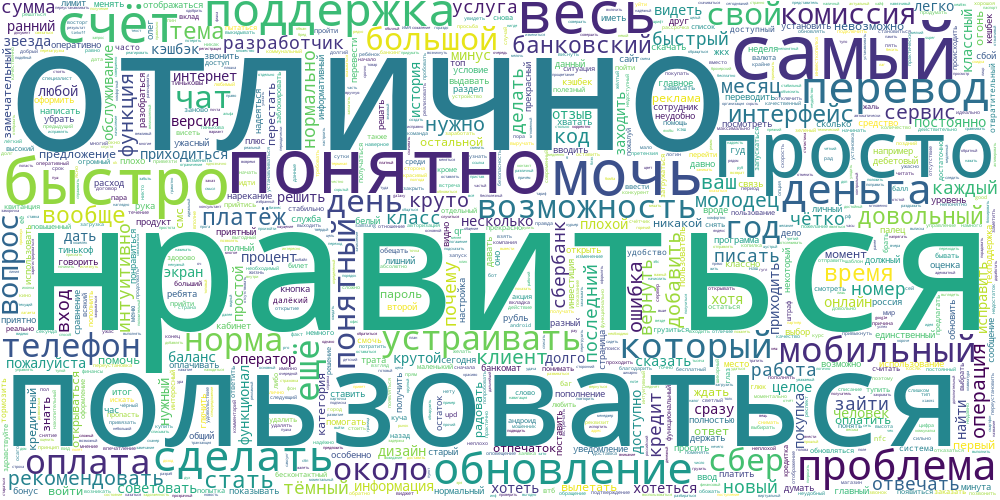

In [4]:
draw_wordcloud(corpus)

In [22]:
import collections

default_corpus = prepare_corpus(path_to_dataset="preprocessed_dataset.csv")

filtered_words = list()
for sent in default_corpus:
    filtered_words += [word for word in sent.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

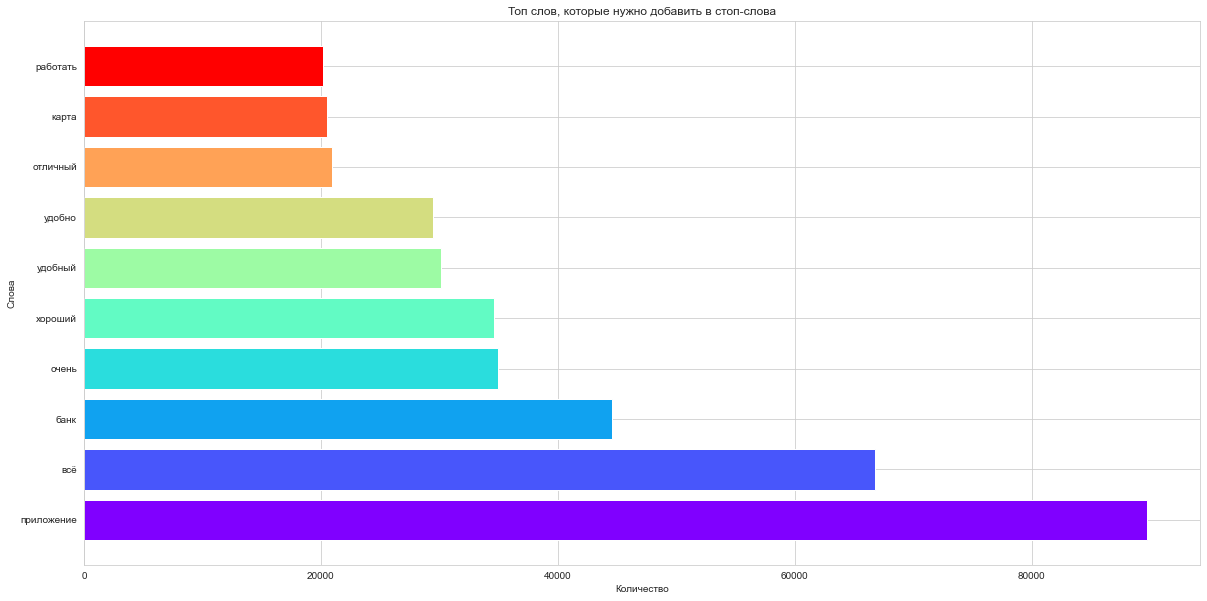

In [23]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import rcParams
import matplotlib.pyplot as plt

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Топ слов, которые нужно добавить в стоп-слова')
plt.xlabel('Количество')
plt.ylabel('Слова')
plt.barh(words, counts, color=colors)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
from sklearn.cluster import KMeans
import pandas as pd

nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
tfidf_news = TfidfVectorizer(stop_words=stop_words)
X = tfidf_news.fit_transform(corpus[:20000])

news_kmeans = KMeans(n_clusters=9)
data = pd.DataFrame()
data["text"] = corpus[:20000]
data["class"] = news_kmeans.fit_predict(X)

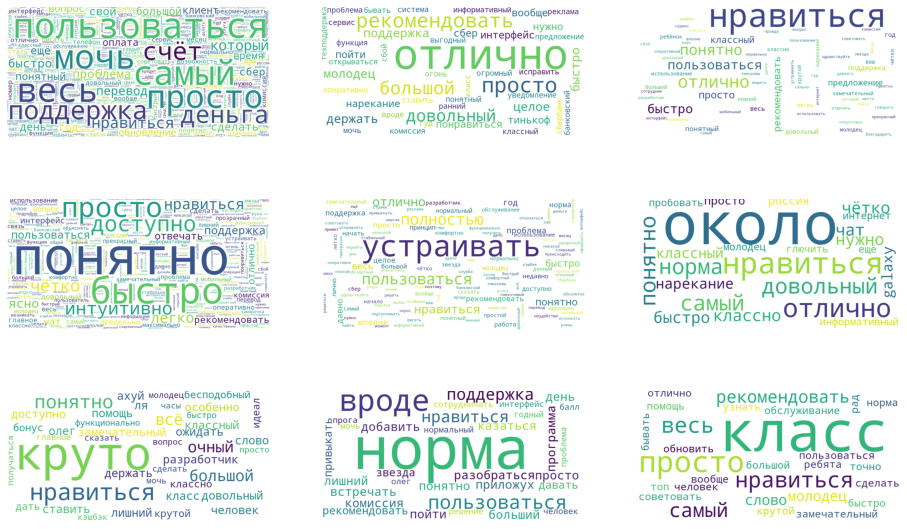

In [9]:
import matplotlib.pyplot as plt

images = [draw_wordcloud(data[data["class"] == i].text) for i in range(9)]

fig, ax = plt.subplots(3, 3, figsize=(16, 10))
for i in range(9):
    ax[i // 3, i % 3].set_axis_off()
    ax[i // 3, i % 3].imshow(images[i])
plt.show()

In [10]:
from sklearn.cluster import SpectralClustering

In [11]:
tfidf_news = TfidfVectorizer(stop_words=stop_words)
X = tfidf_news.fit_transform(corpus[:5000])

data = pd.DataFrame()
data["text"] = corpus[:5000]
news_spectral = SpectralClustering(n_clusters=8, n_components=16)
data["class"] = news_spectral.fit_predict(X)

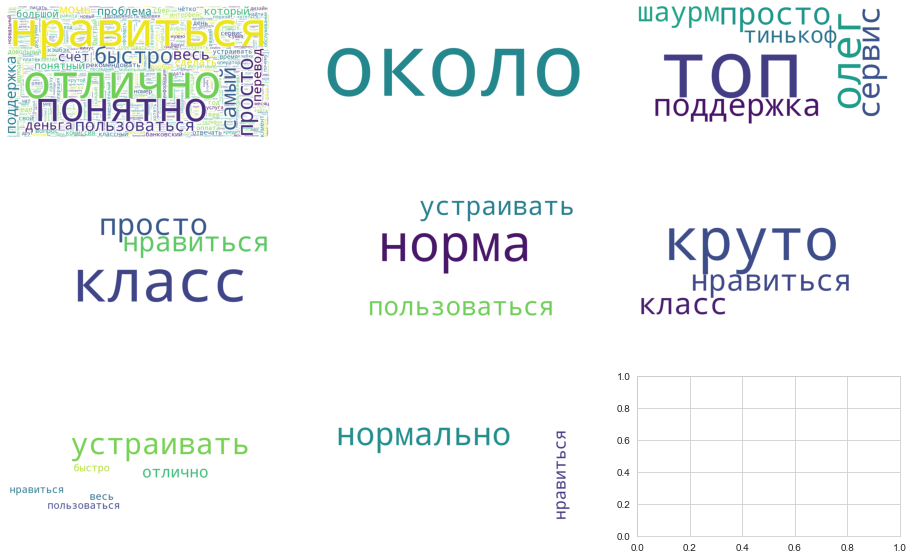

In [12]:
images = [draw_wordcloud(data[data["class"] == i].text) for i in data["class"].unique()]

fig, ax = plt.subplots(3, 3, figsize=(16, 10))
for i in range(min(9, len(images))):
    ax[i // 3, i % 3].set_axis_off()
    ax[i // 3, i % 3].imshow(images[i])
plt.show()

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vectorizer = CountVectorizer()
lda = LatentDirichletAllocation(n_components=25)

In [15]:
kek = lda.fit_transform(count_vectorizer.fit_transform(corpus[:20000]))

In [18]:
data = pd.DataFrame()
data["text"] = corpus[:20000]
data["Dirihle_class"] = kek.argmax(axis=1)

In [19]:
images = [draw_wordcloud(data[data["Dirihle_class"] == i].text) for i in data["Dirihle_class"].unique()]

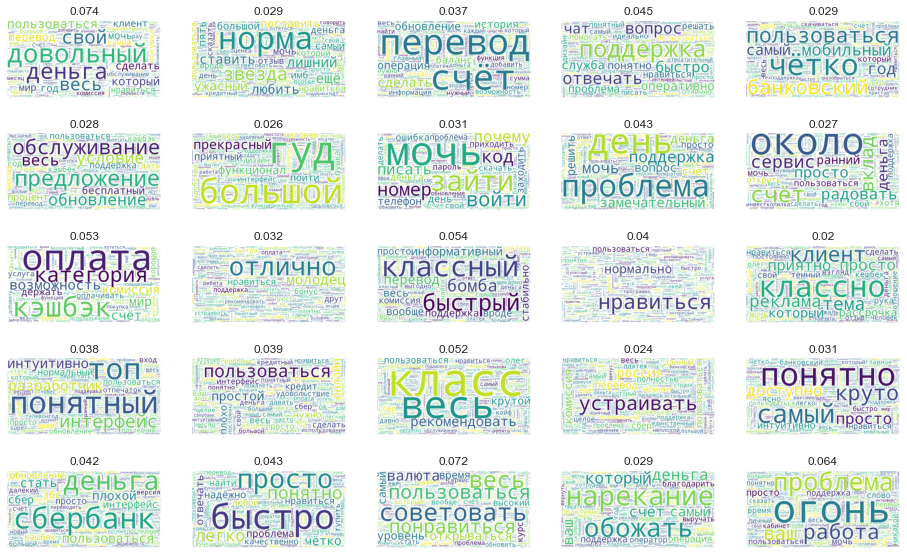

In [21]:
fig, ax = plt.subplots(5, 5, figsize=(16, 10))
for i in range(min(25, len(images))):
    ax[i // 5, i % 5].set_axis_off()
    ax[i // 5, i % 5].imshow(images[i])
    ax[i // 5, i % 5].set_title(round(len(data[data["Dirihle_class"] == i]) / len(data), 3))
plt.show()

In [ ]:
from code_.vectorization.Word2Vec import Word2Vec_Model

